In [1]:
#max E[(X_{T}^{h}-X_{h})]

import numpy as np
import matplotlib.pyplot as plt
X_err_strong_Euler=[]
X_err_strong_Mil=[]
X_err_weak_Euler=[]
X_err_weak_Mil=[]


Dt=[2**(i-10) for i in range(7)]
mc=10000
b=2; sigma=1; X_zero=1
for k in Dt:
    t=np.arange(k,1+k,k)
    n=len(t)
      
    X_err_Euler_strong=np.zeros(n)
    X_err_Mil_strong=np.zeros(n)
    X_err_Euler_weak=np.zeros(n)
    X_err_Mil_weak=np.zeros(n)
    X_true_Sum=np.zeros(n)
    for j in range(mc):
        np.random.seed(j)
        dB=np.sqrt(k)*np.random.randn(n)
        B=np.cumsum(dB)
        X_Euler=1; X_Mil=1; X_Euler1=[]; X_Mil1=[]
        X_true= X_zero*np.exp((b-0.5*sigma**2)*t+ sigma*B)
        for p in range (n):
            X_Euler+= b*X_Euler*k+ sigma*X_Euler*dB[p]
            X_Euler1.append(X_Euler)
            X_Mil+= b*X_Mil*k+ sigma*X_Mil*dB[p]+0.5*X_Mil*((dB[p])**2-k)
            X_Mil1.append(X_Mil)           
            
        
        X_err_Euler_strong+= abs(X_Euler1-X_true)
        X_err_Mil_strong+= abs(X_Mil1-X_true)
        X_err_Euler_weak += X_Euler1 
        X_err_Mil_weak += X_Mil1
        X_true_Sum += X_true

        
    X_err_strong_Euler.append(max(X_err_Euler_strong/mc))
    X_err_strong_Mil.append(max(X_err_Mil_strong/mc))
    X_err_weak_Euler.append(max(abs(X_err_Euler_weak/mc-X_true_Sum/mc)))
    X_err_weak_Mil.append(max(abs(X_err_Mil_weak/mc-X_true_Sum/mc)))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
Err_Euler1 = np.array(X_err_strong_Euler).reshape(-1,1)
Err_Euler2 = np.array(X_err_strong_Mil).reshape(-1,1)
Err_Euler3 = np.array(X_err_weak_Euler).reshape(-1,1)
Err_Euler4 = np.array(X_err_weak_Mil).reshape(-1,1)
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(X_err_strong_Euler))
reg2 = LinearRegression().fit(np.log(h), np.log(X_err_strong_Mil))
reg3 = LinearRegression().fit(np.log(h), np.log(X_err_weak_Euler))
reg4 = LinearRegression().fit(np.log(h), np.log(X_err_weak_Mil))

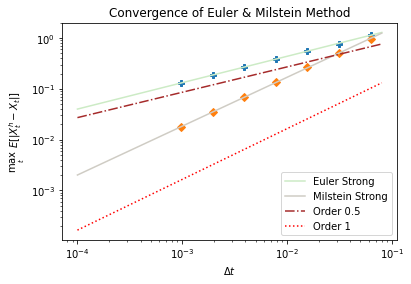

In [4]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
plt.loglog(Dt , X_err_strong_Euler , 'P')
plt.loglog(Dt, X_err_strong_Mil, 'D')

x=np.linspace(0.0001,0.08)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Euler Strong')
plt.loglog(x, z, color=pal[3], label='Milstein Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of Euler & Milstein Method')
plt.xlabel('$\Delta t$'); plt.ylabel('$\max_t\\ E[|X_{t}^{h}-X_{t}|]$'); plt.legend(loc=4);

plt.show()      

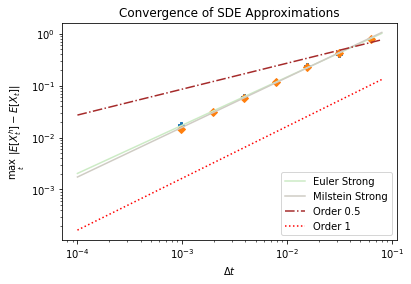

In [12]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
plt.loglog(Dt, X_err_weak_Euler,'P')
plt.loglog(Dt, X_err_weak_Mil,'D')


x=np.linspace(0.0001,0.08)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg3.intercept_) * x**reg3.coef_
z = np.exp(reg4.intercept_) * x**reg4.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Euler Strong')
plt.loglog(x, z, color=pal[3], label='Milstein Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of SDE Approximations')
plt.xlabel('$\Delta t$'); plt.ylabel('$\max_t\\ |E[X_{t}^{h}]-E[X_{t}]|$'); plt.legend(loc=4);

plt.show()      

In [13]:
#E[|X_{T}^{N}-X_{T}|]

import numpy as np
import matplotlib.pyplot as plt
X_err_strong_Euler=[]
X_err_strong_Mil=[]
X_err_weak_Euler=[]
X_err_weak_Mil=[]


Dt=[2**(i-10) for i in range(7)]
mc=10000
b=2; sigma=1; X_zero=1
for k in Dt:
    t=np.arange(k,1+k,k)
    n=len(t)
      
    X_err_Euler_strong=0
    X_err_Mil_strong=0
    X_err_Euler_weak=0
    X_err_Mil_weak=0
    X_true_Sum=0
    Euler1=0
    Mil1=0
    for j in range(mc):
        np.random.seed(j)
        dB=np.sqrt(k)*np.random.randn(n)
        B=np.cumsum(dB)
        X_Euler=1; X_Mil=1; X_Euler1=[]; X_Mil1=[]
        X_true= X_zero*np.exp((b-0.5*sigma**2)*(1+k)+ sigma*B[-1])
        for p in range (n):
            X_Euler+= b*X_Euler*k+ sigma*X_Euler*dB[p]
            X_Mil+= b*X_Mil*k+ sigma*X_Mil*dB[p]+0.5*X_Mil*((dB[p])**2-k)               
   
        X_err_Euler_strong+= abs(X_Euler-X_true)
        X_err_Mil_strong+= abs(X_Mil-X_true)
        Euler1+= X_Euler
        X_true_Sum+= X_true
        Mil1+= X_Mil
       
        
    X_err_strong_Euler.append(X_err_Euler_strong/mc)
    X_err_strong_Mil.append(X_err_Mil_strong/mc)
    X_err_weak_Euler.append(abs(Euler1/mc-X_true_Sum/mc))
    X_err_weak_Mil.append(abs(Mil1/mc-X_true_Sum/mc))

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [22]:
Err_Euler1 = np.array(X_err_strong_Euler).reshape(-1,1)
Err_Euler2 = np.array(X_err_strong_Mil).reshape(-1,1)
Err_Euler3 = np.array(X_err_weak_Euler).reshape(-1,1)
Err_Euler4 = np.array(X_err_weak_Mil).reshape(-1,1)
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(X_err_strong_Euler))
reg2 = LinearRegression().fit(np.log(h), np.log(X_err_strong_Mil))
reg3 = LinearRegression().fit(np.log(h), np.log(X_err_weak_Euler))
reg4 = LinearRegression().fit(np.log(h), np.log(X_err_weak_Mil))

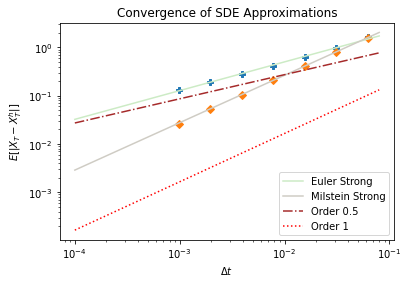

In [27]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
plt.loglog(Dt , X_err_strong_Euler, 'P' )
plt.loglog(Dt, X_err_strong_Mil,'D')

x=np.linspace(0.0001,0.08)
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Euler Strong')
plt.loglog(x, z, color=pal[3], label='Milstein Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')



plt.title('Convergence of SDE Approximations')
plt.xlabel('$\Delta t$'); plt.ylabel('$E[|X_{T}-X_{T}^{h}|]$'); plt.legend(loc=4);

plt.show()  

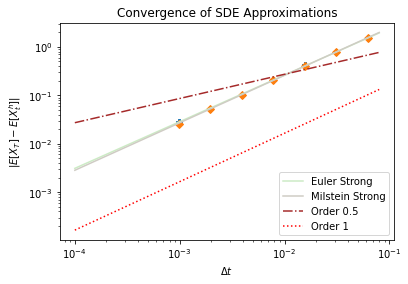

In [28]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]


plt.loglog(Dt, X_err_weak_Euler,'P')
plt.loglog(Dt, X_err_weak_Mil,'D')


x=np.linspace(0.0001,0.08)
y = np.exp(reg3.intercept_) * x**reg3.coef_
z = np.exp(reg4.intercept_) * x**reg4.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Euler Strong')
plt.loglog(x, z, color=pal[3], label='Milstein Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')

plt.title('Convergence of SDE Approximations')
plt.xlabel('$\Delta t$'); plt.ylabel('$|E[X_{T}]-E[X_{t}^{h}]|$'); plt.legend(loc=4);

plt.show()  